In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def openFiles(fileName):
    with open(fileName) as file:
        [file.readline() for x in range(5)]
        data = np.fromfile(file, sep= " ", dtype=float)
    phi, energy, error= data.reshape(-1,3).T
    return phi, energy

fileNames= {
    "energys_1FPara.xvg": "1F_para",
    "energys_4FOrtho.xvg" : "4F-Ortho",
    "energys_AzobenzOld.xvg": "AzobenzeneOld",
    "energys_4IOrtho.xvg": "4I-Ortho",
}

def genData(fileNames:dict[str,str]):
    for fileName in fileNames.keys():
        data = openFiles(fileName)
        label = fileNames[fileName]
        yield data, label

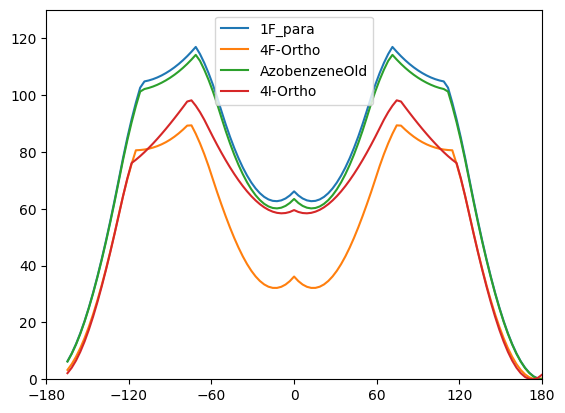

In [37]:
fig, ax = plt.subplots()
ax.set_xlim(-180, 180)
ax.set_ylim(0, 130)
ax.set_xticks([x for x in range(-180, 181, 60)])
for data, label in genData(fileNames):
    ax.plot(data[0], data[1], label = label)
ax.legend();
fig.savefig("energys.png")